In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
data = pd.read_csv('Final_Balanced_Cleaned_Car Accident Dataset.csv')
print(data.shape)
print(data.head())

(171016, 16)
   Day_of_Week  Junction_Control  Latitude  Light_Conditions  \
0            1                 3  0.539929                 4   
1            1                 4  0.090052                 4   
2            1                 5  0.032547                 4   
3            3                 5  0.337348                 1   
4            0                 4  0.155597                 1   

   Local_Authority_(District)  Longitude  Number_of_Casualties  \
0                         321   0.388342                   0.0   
1                         116   0.597126                   0.0   
2                          88   0.262809                   0.0   
3                         406   0.521226                   0.0   
4                         160   0.794396                   0.0   

   Number_of_Vehicles  Road_Surface_Conditions  Road_Type  Speed_limit  \
0            0.000000                        0          3     0.833333   
1            0.064516                        4          3

In [20]:
# Select features and target variable
features = ['Day_of_Week', 'Junction_Control','Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Longitude','Number_of_Casualties'
            ,'Number_of_Vehicles','Speed_limit','Urban_or_Rural_Area', 'Hour',   'Minute',
            'Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions']
X = data[features]
y = data['Accident_Severity']
print(y)  # Xem trước 10 giá trị đầu tiên sau khi mã hóa

0         3
1         3
2         3
3         3
4         3
         ..
171011    2
171012    2
171013    2
171014    2
171015    2
Name: Accident_Severity, Length: 171016, dtype: int64


In [21]:
print(X.shape)  # Kiểm tra hình dạng của dữ liệu sau khi mã hóa

(171016, 15)


In [22]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_validate.shape[0]}")

Training samples: 119711
Test samples: 51305


In [30]:
scaler = StandardScaler(with_mean=False) 
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
print(X_train.shape)
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

(119711, 15)


KNeighborsClassifier()

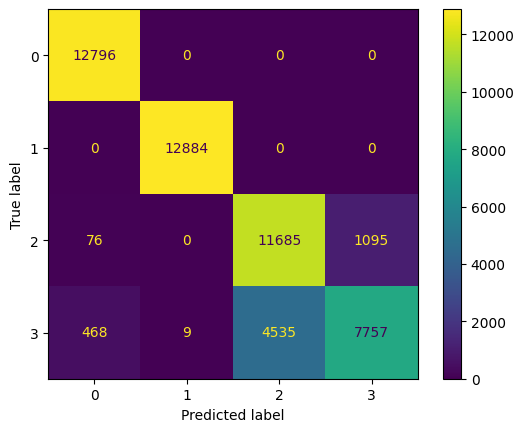

In [32]:
y_pred = kNN.predict(X_validate)
# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(kNN, X_validate, y_validate)

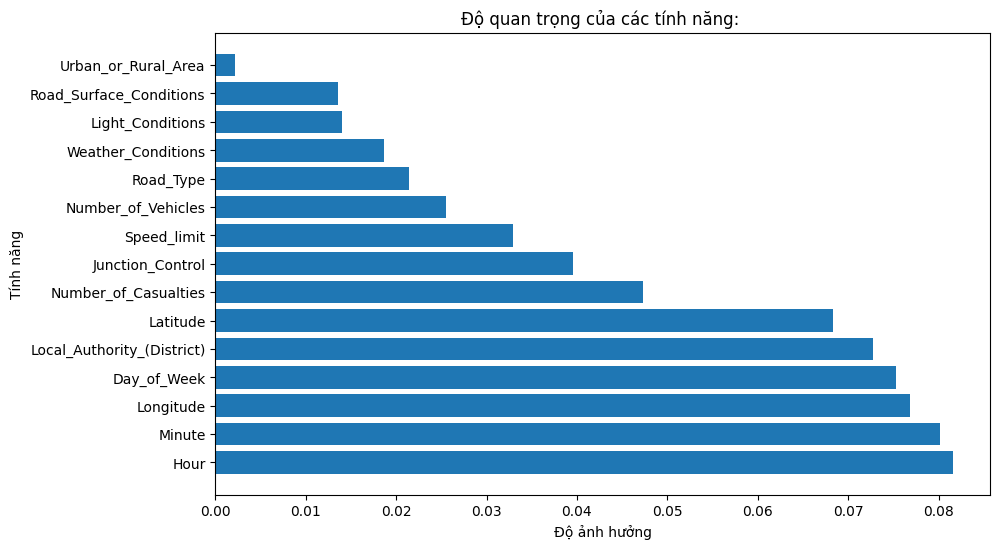

In [36]:
# Tính toán trung bình giá trị của các đặc trưng tương ứng với các láng giềng
avg_neighbor_values = []

for sample in X_validate:
    # Tìm các láng giềng gần nhất
    _, indices = kNN.kneighbors(sample.reshape(1, -1))
    # Tính toán giá trị trung bình của các đặc trưng cho các láng giềng
    avg_neighbors = np.mean(X_train[indices[0]], axis=0)
    avg_neighbor_values.append(avg_neighbors)

# Tính toán độ lệch giữa giá trị của mẫu kiểm tra và giá trị trung bình của láng giềng
feature_impact = np.mean(np.abs(X_validate - np.array(avg_neighbor_values)), axis=0)

# Sắp xếp các tính năng theo độ ảnh hưởng
sorted_features = sorted(zip(features, feature_impact), key=lambda x: x[1], reverse=True)
sorted_feature_names = [x[0] for x in sorted_features]
sorted_feature_impact = [x[1] for x in sorted_features]

# Vẽ biểu đồ cột đã sắp xếp
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_impact)
plt.xlabel('Độ ảnh hưởng')
plt.ylabel('Tính năng')
plt.title('Độ quan trọng của các tính năng: ')
plt.show()

In [37]:
#Algorithms Evaluation
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [40]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
y_pred = kNN.predict(X_validate)
accuracy["KNN"] = accuracy_score(y_validate, y_pred)
f1["KNN"] = f1_score(y_validate, y_pred, average="macro")
print("Classification report trên tập huấn luyện:")
print(classification_report(y_train, kNN.predict(X_train)))
print("Classification report trên tập kiểm tra:")
print(classification_report(y_validate, y_pred))

Classification report trên tập huấn luyện:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     29958
           1       1.00      1.00      1.00     29870
           2       0.78      0.97      0.87     29898
           3       0.96      0.71      0.81     29985

    accuracy                           0.92    119711
   macro avg       0.93      0.92      0.92    119711
weighted avg       0.93      0.92      0.92    119711

Classification report trên tập kiểm tra:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12796
           1       1.00      1.00      1.00     12884
           2       0.72      0.91      0.80     12856
           3       0.88      0.61      0.72     12769

    accuracy                           0.88     51305
   macro avg       0.89      0.88      0.88     51305
weighted avg       0.89      0.88      0.88     51305



In [42]:
accuracy["KNN"] = accuracy_score(y_validate, y_pred)
print("Accuracy - KNN: ", accuracy["KNN"])

Accuracy - KNN:  0.8794854302699542


In [44]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
f1["KNN"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - KNN: ", f1["KNN"])
print("precision - KNN: ", precisionScore)
print("recall - KNN: ", recallScore)

f1-Score - KNN:  0.8750338632625563
precision - KNN:  0.8888070957725953
recall - KNN:  0.8791002519982789


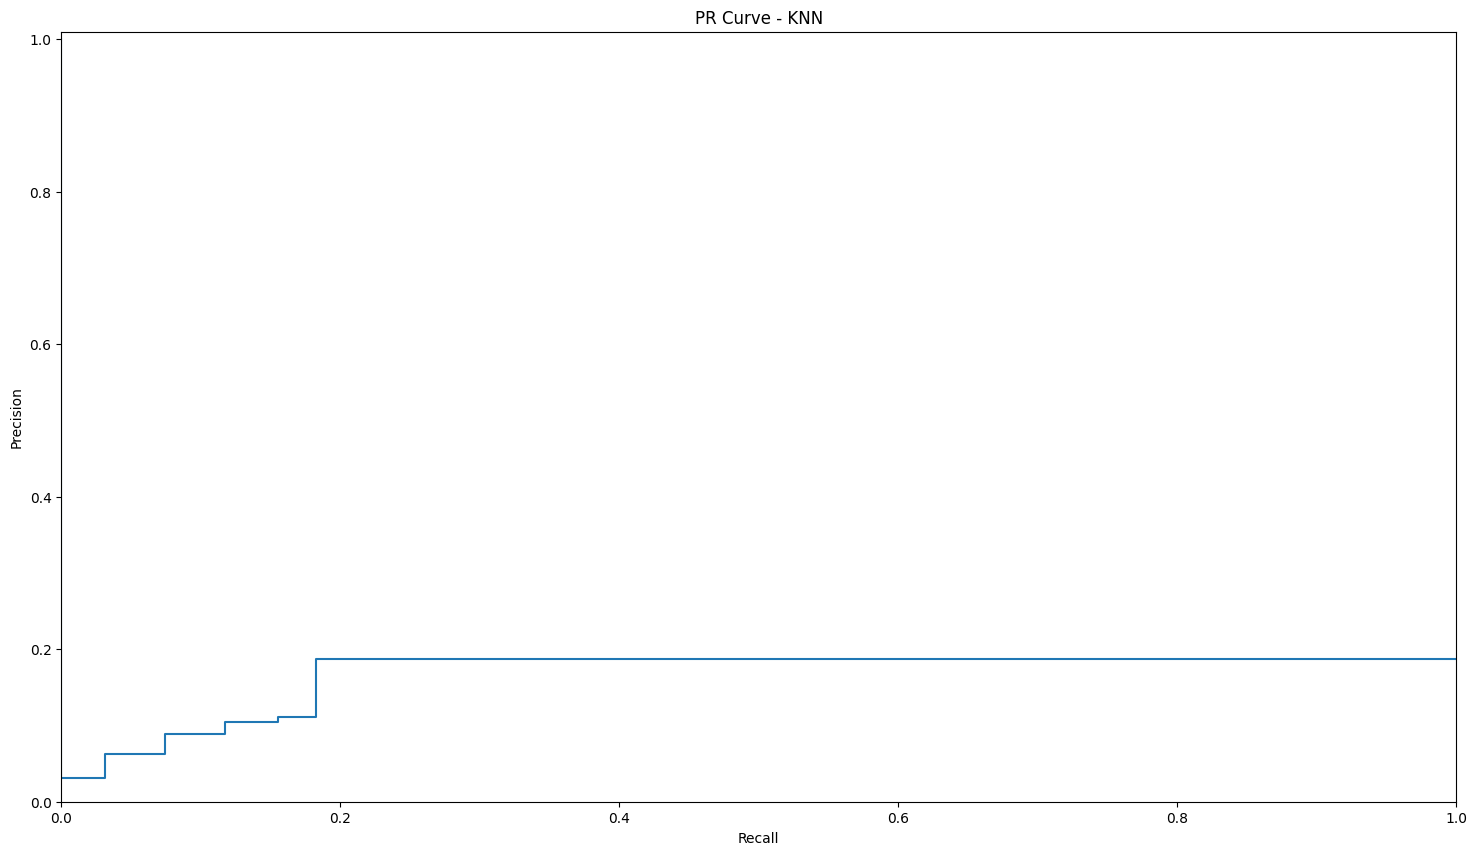

In [47]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = kNN.predict_proba(X_validate)
precision["KNN"], recall["KNN"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["KNN"], tpr["KNN"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["KNN"], precision["KNN"], where="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - KNN")
plt.show()

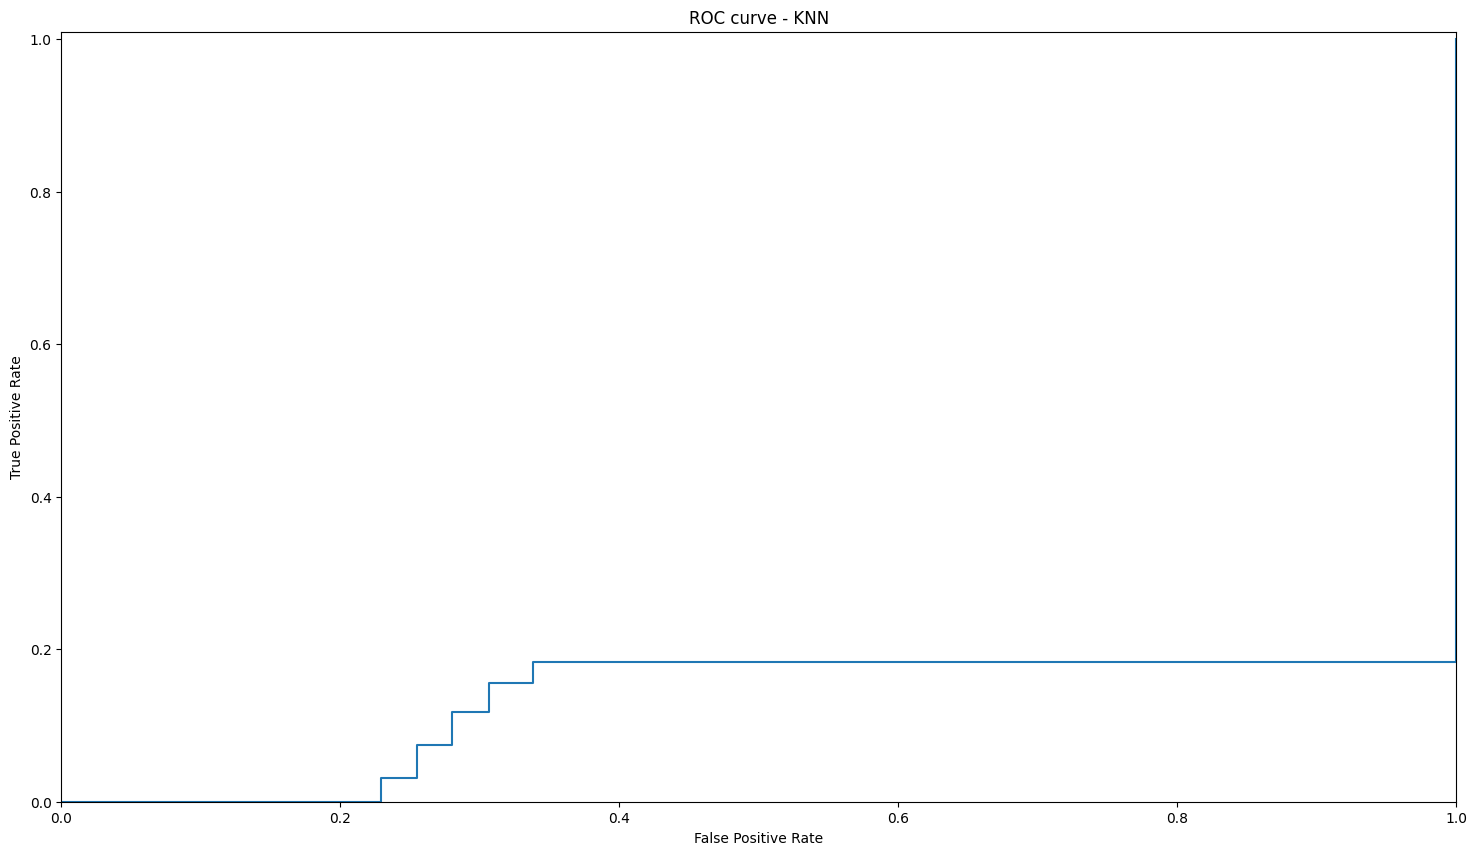

In [48]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = kNN.predict_proba(X_validate)
fpr["KNN"], tpr["KNN"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["KNN"], tpr["KNN"], where="post")

plt.title("ROC curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()